In [1]:
# подключение библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
import tensorflow as tf
import seaborn as sns

In [2]:
# импорт процедур 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

from tensorflow import keras 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Flatten 

from pandas import read_excel, DataFrame, Series

In [3]:
df_x_bp = pd.read_excel('hw_data_composite\X_bp.xlsx', index_col = 0)
df_x_bp

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [4]:
df_x_nup = pd.read_excel('hw_data_composite\X_nup.xlsx', index_col = 0)
df_x_nup

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,4.000000,57.000000
1,0,4.000000,60.000000
2,0,4.000000,70.000000
3,0,5.000000,47.000000
4,0,5.000000,57.000000
...,...,...,...
1035,90,8.088111,47.759177
1036,90,7.619138,66.931932
1037,90,9.800926,72.858286
1038,90,10.079859,65.519479


In [5]:
# объединение файлов по индексу, тип INNER
df_all = df_x_bp.merge(df_x_nup, left_index = True, right_index = True, how = 'inner')
df_all

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [6]:
# на всяк случкй сохраним все
#df_all.to_excel("all.xlsx")

#статистика
df_all.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


In [7]:
# удаляем пропуск (если есть)
df_all.drop_duplicates()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [8]:
column_list = df_all.columns
column_list

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

Соотношение матрица-наполнитель


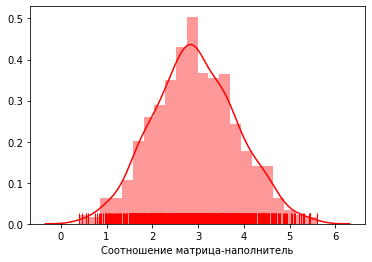

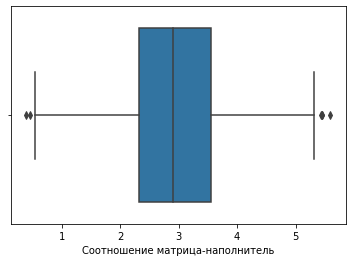

Минимальное значение:  0.389402605178414
Максимальное значение:  5.59174159869754
Среднее значение:  2.9303657734325506
Медианное значение:  2.90687765033521



Плотность, кг/м3


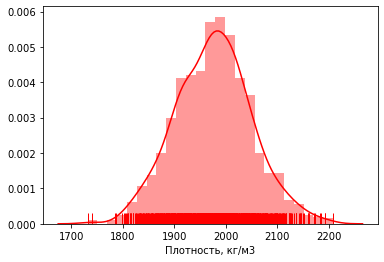

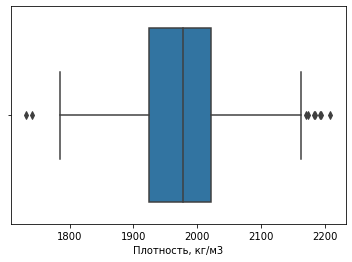

Минимальное значение:  1731.764635096
Максимальное значение:  2207.77348061119
Среднее значение:  1975.7348881101548
Медианное значение:  1977.62165679058



модуль упругости, ГПа


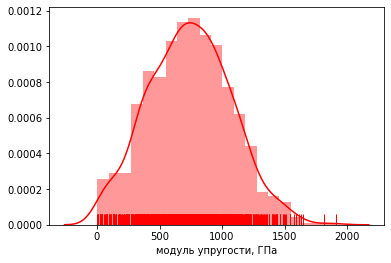

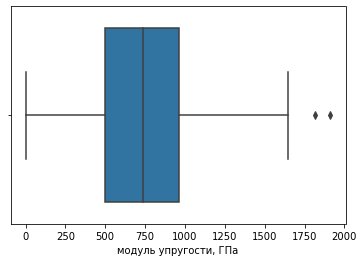

Минимальное значение:  2.4369087535075
Максимальное значение:  1911.53647700054
Среднее значение:  739.9232327560719
Медианное значение:  739.664327697792



Количество отвердителя, м.%


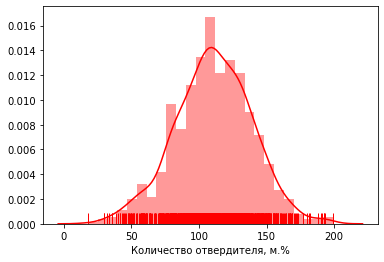

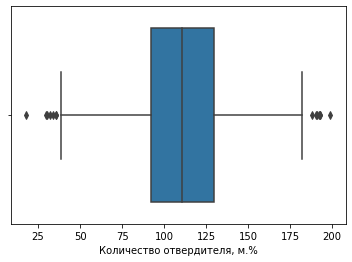

Минимальное значение:  17.7402745562519
Максимальное значение:  198.953207190451
Среднее значение:  110.57076864736258
Медианное значение:  110.564839894065



Содержание эпоксидных групп,%_2


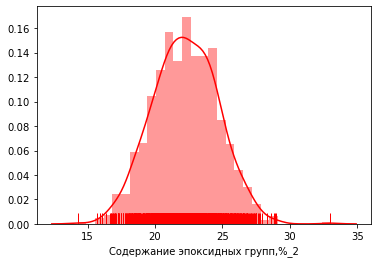

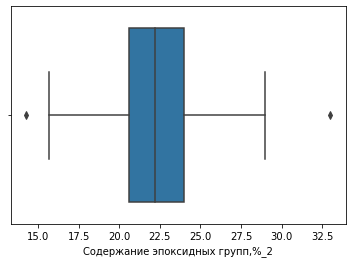

Минимальное значение:  14.2549854977161
Максимальное значение:  33.0
Среднее значение:  22.24438954776772
Медианное значение:  22.2307437560244



Температура вспышки, С_2


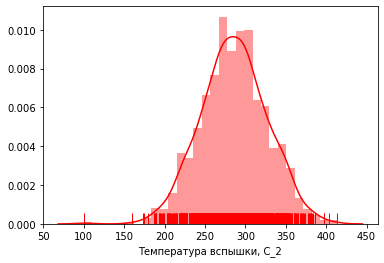

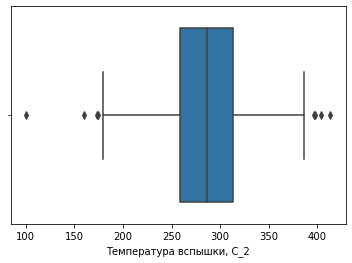

Минимальное значение:  100.0
Максимальное значение:  413.273418243566
Среднее значение:  285.88215135162227
Медианное значение:  285.896812331237



Поверхностная плотность, г/м2


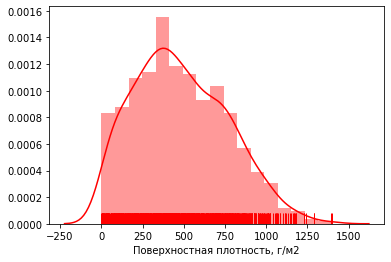

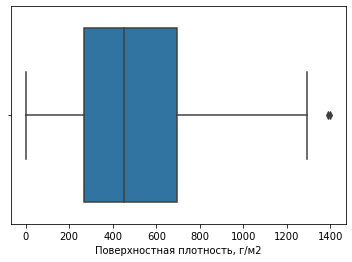

Минимальное значение:  0.603739925153945
Максимальное значение:  1399.54236233989
Среднее значение:  482.7318330384181
Медианное значение:  451.86436518306



Модуль упругости при растяжении, ГПа


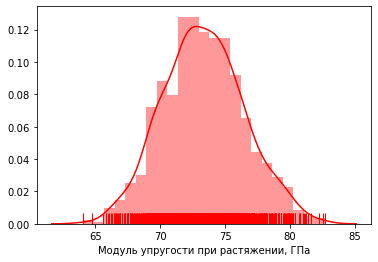

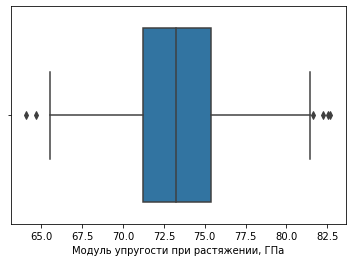

Минимальное значение:  64.0540605597917
Максимальное значение:  82.682051035271
Среднее значение:  73.32857125009073
Медианное значение:  73.2688045943481



Прочность при растяжении, МПа


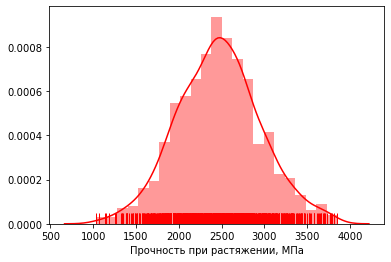

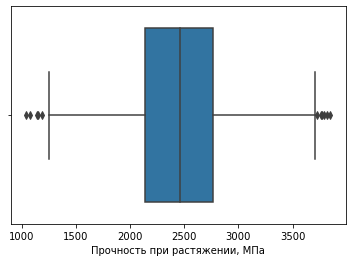

Минимальное значение:  1036.85660535
Максимальное значение:  3848.43673187618
Среднее значение:  2466.9228426979025
Медианное значение:  2459.52452600309



Потребление смолы, г/м2


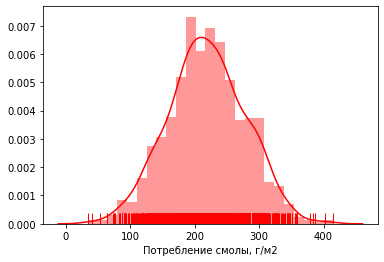

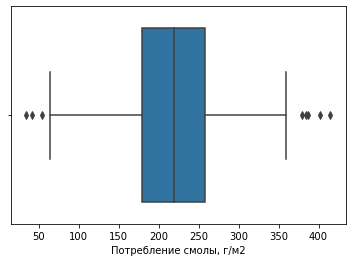

Минимальное значение:  33.8030255329625
Максимальное значение:  414.590628361534
Среднее значение:  218.42314367654265
Медианное значение:  219.198882195134



Угол нашивки, град


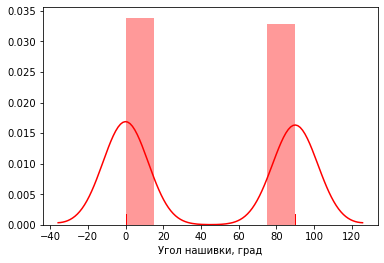

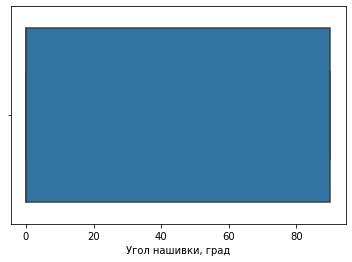

Минимальное значение:  0
Максимальное значение:  90
Среднее значение:  44.252199413489734
Медианное значение:  0.0



Шаг нашивки


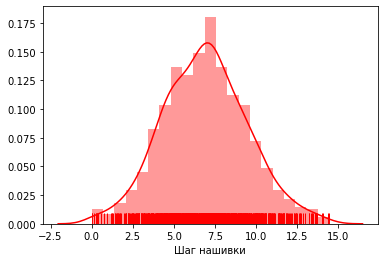

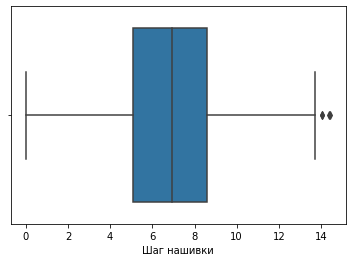

Минимальное значение:  0.0
Максимальное значение:  14.4405218753969
Среднее значение:  6.899222077675024
Медианное значение:  6.9161438559491



Плотность нашивки


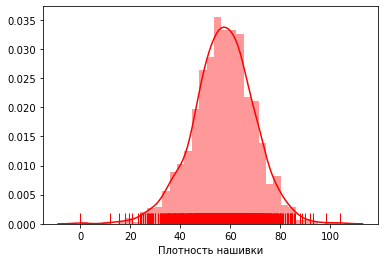

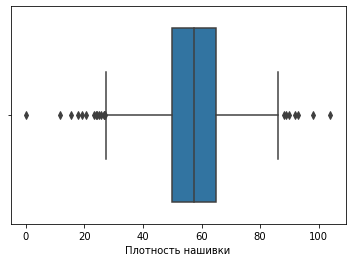

Минимальное значение:  0.0
Максимальное значение:  103.988901301494
Среднее значение:  57.15392943285763
Медианное значение:  57.3419198469929





In [9]:
#анализ необработ данных (без нормализации и исключения шумов)
for colname in column_list:
    print(colname)
    prn_data = df_all[colname]

#  #Гистограмма распределения
   
#    sns.set_style("darkgrid")
    sns.distplot(prn_data, rug=True, color='red')
#    sns.kdeplot(data=prn_data, shade=True, palette='colorblind')
    plt.show()
    
    #Диаграмма "Ящик с усами"
    sns.boxplot(x=prn_data);
    plt.show()
    
    #Минимальное значение
    print("Минимальное значение: ", end=" ")
    print(min(prn_data))
    
    #Среднее значение
    print("Максимальное значение: ", end=" ")
    print(max(prn_data))
    
    #Среднее значение
    print("Среднее значение: ", end=" ")
    print(np.mean(prn_data))
    
    #Медианное значение
    print("Медианное значение: ", end=" ")
    print(np.median(prn_data))
    print("\n\n")


In [10]:
# выбросы есть везде, кроме угла нашивки =  (0..90 degr)
colnames_need_drop = ["Соотношение матрица-наполнитель","Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%",
         "Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2",
         "Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",
                 "Шаг нашивки","Плотность нашивки"]

#сделаем замену выбросов на пустые значения 
for x in colnames_need_drop:
    q75,q25 = np.percentile(df_all.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    df_all.loc[df_all[x]<min,x] = np.nan
    df_all.loc[df_all[x]>max,x] = np.nan

In [11]:
# сумма выбросов по каждому столбцу
df_all.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [12]:
#Исключим те строки, которые содержат выбросы (пустые значения по некоторым столбцам)
df_all = df_all.dropna(axis=0)

# повторная перепроверка
df_all.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [13]:
# df_all.describe()
# осталось 936 строк
df_all.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       936 non-null    float64
 1   Плотность, кг/м3                      936 non-null    float64
 2   модуль упругости, ГПа                 936 non-null    float64
 3   Количество отвердителя, м.%           936 non-null    float64
 4   Содержание эпоксидных групп,%_2       936 non-null    float64
 5   Температура вспышки, С_2              936 non-null    float64
 6   Поверхностная плотность, г/м2         936 non-null    float64
 7   Модуль упругости при растяжении, ГПа  936 non-null    float64
 8   Прочность при растяжении, МПа         936 non-null    float64
 9   Потребление смолы, г/м2               936 non-null    float64
 10  Угол нашивки, град                    936 non-null    int64  
 11  Шаг нашивки       

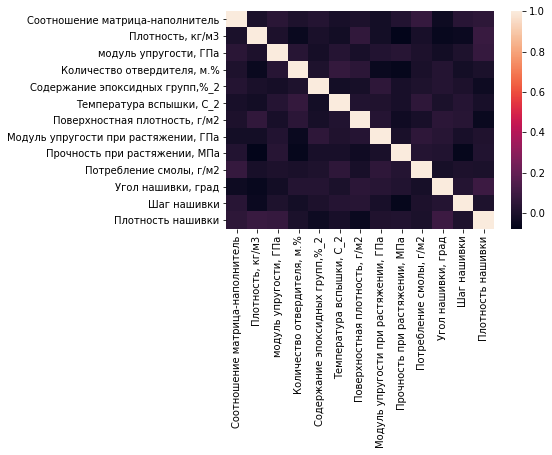

In [14]:
# попарная корреляция
sns.heatmap(df_all.corr())

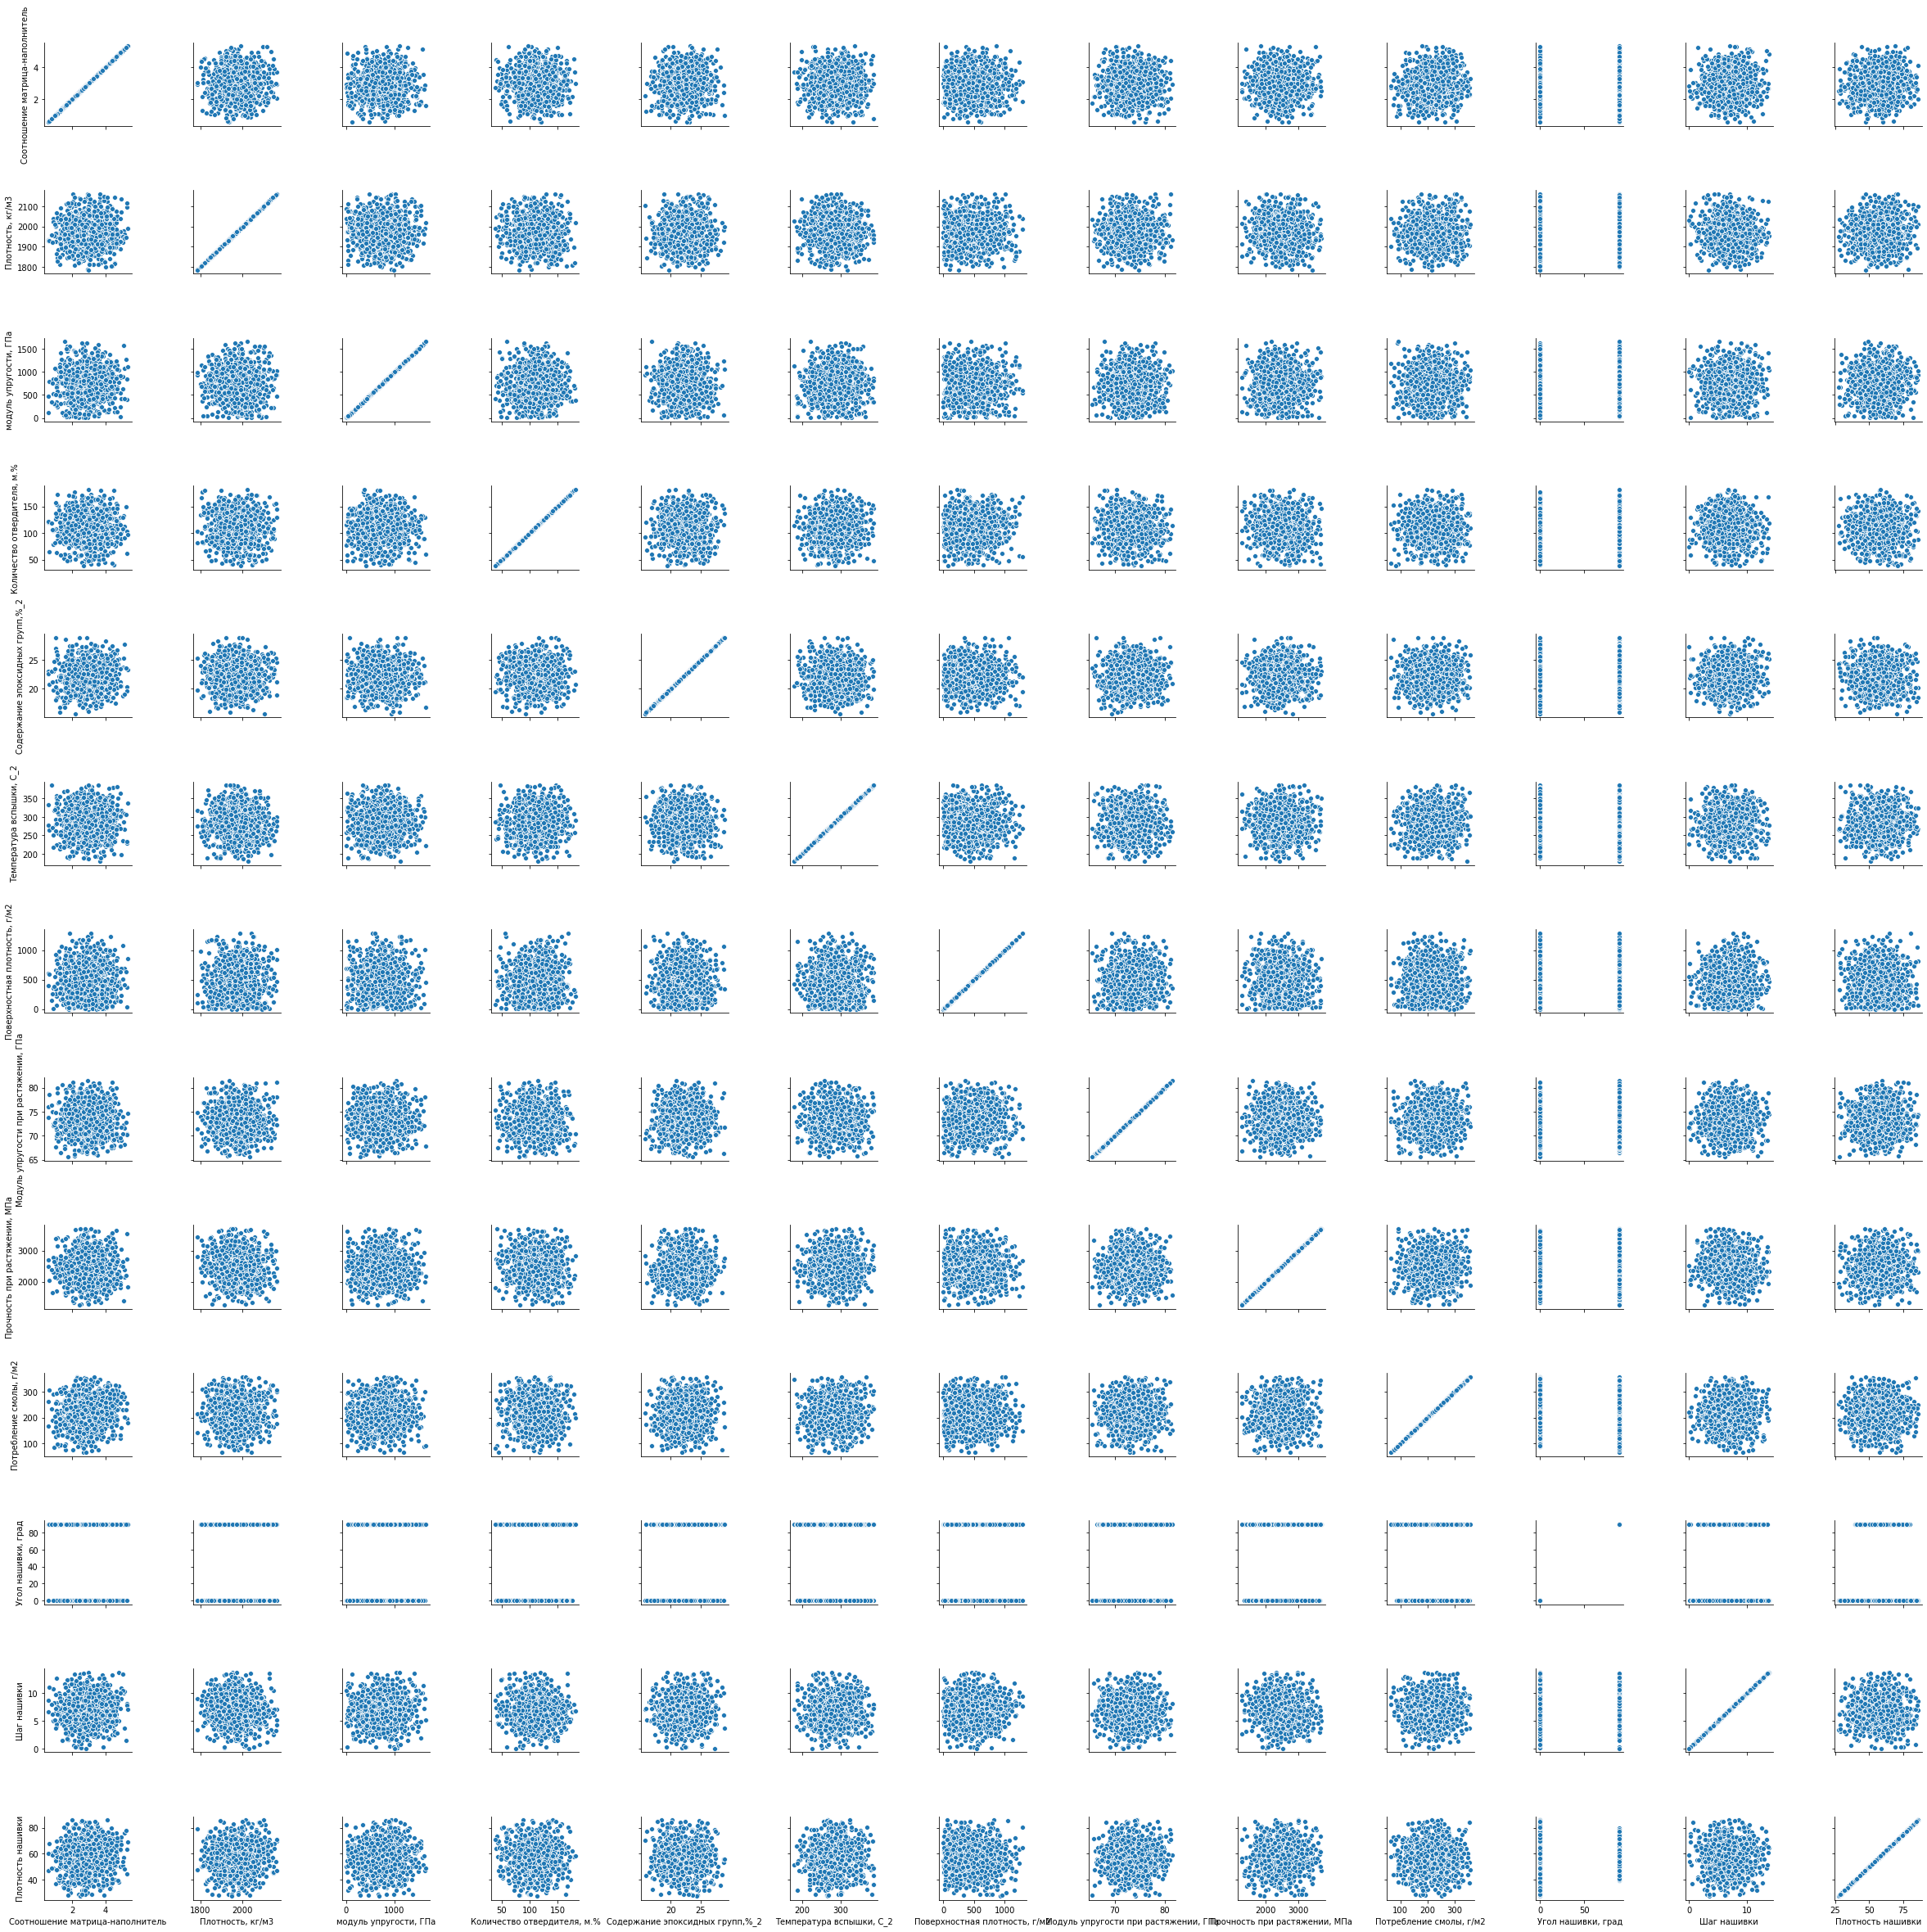

In [15]:
# попарная зависимость
cols = df_all.columns
p = sns.PairGrid(df_all[cols])
p.map(sns.scatterplot)

In [16]:
# нормализуем данные
minmax_sclr = preprocessing.MinMaxScaler()
col = df_all.columns
result = minmax_sclr.fit_transform(df_all)

df_all_normal = pd.DataFrame(result, columns=col)
df_all_normal

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.274768,0.651097,0.447061,0.079153,0.607435,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.289334,0.557156
1,0.274768,0.651097,0.447061,0.630983,0.418887,0.583596,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.335840
2,0.466552,0.651097,0.455721,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.506083
3,0.465836,0.571539,0.452685,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.557156
4,0.424236,0.332865,0.488508,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.727399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,0.361662,0.444480,0.552781,0.337550,0.333908,0.703458,0.161609,0.475147,0.463043,0.207613,1.0,0.660014,0.336177
932,0.607674,0.704373,0.268550,0.749605,0.294428,0.362087,0.271207,0.464422,0.452087,0.182974,1.0,0.768759,0.450768
933,0.573391,0.498274,0.251612,0.501991,0.623085,0.334063,0.572959,0.578740,0.575296,0.585446,1.0,0.301102,0.687046
934,0.662497,0.748688,0.448724,0.717585,0.267818,0.466417,0.496511,0.535142,0.334513,0.451779,1.0,0.458245,0.527552


In [17]:
# на всяк случай сохраним в xlxs и csv
# df_all_normal.to_excel("all_normal.xlsx")
# df_all_normal.to_csv("all_normal.csv", sep=';')


#Определение попарной корреляции между параметрами
df_all_normal[df_all_normal.columns].corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.001676,0.043888,0.007812,0.027587,-0.006275,0.007540,-0.019248,0.024488,0.075740,-0.035897,0.039109,0.052466
"Плотность, кг/м3",0.001676,1.000000,0.004326,-0.050210,-0.001065,-0.023507,0.062705,-0.021316,-0.076305,-0.005133,-0.051336,-0.045229,0.084077
"модуль упругости, ГПа",0.043888,0.004326,1.000000,0.036523,-0.013271,0.029318,-0.008987,0.021086,0.036641,0.004450,-0.021886,0.011345,0.078091
"Количество отвердителя, м.%",0.007812,-0.050210,0.036523,1.000000,0.011330,0.072273,0.046211,-0.048208,-0.063256,-0.002268,0.026539,-0.021198,0.001485
"Содержание эпоксидных групп,%_2",0.027587,-0.001065,-0.013271,0.011330,1.000000,-0.019085,-0.013065,0.055271,-0.007097,0.011575,0.026645,0.004465,-0.036126
"Температура вспышки, С_2",-0.006275,-0.023507,0.029318,0.072273,-0.019085,1.000000,0.018884,0.015361,-0.004877,0.057693,0.001721,0.032580,-0.006801
"Поверхностная плотность, г/м2",0.007540,0.062705,-0.008987,0.046211,-0.013065,0.018884,1.000000,0.029643,-0.031777,-0.008295,0.045785,0.033065,-0.048670
"Модуль упругости при растяжении, ГПа",-0.019248,-0.021316,0.021086,-0.048208,0.055271,0.015361,0.029643,1.000000,-0.001422,0.055023,0.034193,-0.007546,0.013445
"Прочность при растяжении, МПа",0.024488,-0.076305,0.036641,-0.063256,-0.007097,-0.004877,-0.031777,-0.001422,1.000000,0.027949,0.017669,-0.061219,0.016894
"Потребление смолы, г/м2",0.075740,-0.005133,0.004450,-0.002268,0.011575,0.057693,-0.008295,0.055023,0.027949,1.000000,-0.009916,0.007569,0.001448


In [18]:
#библиотеки для моделей
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Activation, Dropout

from numpy.random import seed


In [19]:
#входные переменные
col_name_in = ["Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%",
         "Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2"
               ,"Потребление смолы, г/м2",
        "Угол нашивки, град","Шаг нашивки","Плотность нашивки"]
#Входные данные
trn_data = df_all_normal[col_name_in]

#выходные переменные
col_name_res = ["Соотношение матрица-наполнитель",
         "Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"]

#Выходные данные
trg_data = df_all_normal[col_name_res]


In [20]:
#тестовая и обучающая выборки 70/30
Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn_data, trg_data, test_size=0.3)

In [21]:
model_list = [LinearRegression(),   # метод наименьших квадратов
KNeighborsRegressor(n_neighbors=5), # метод ближайших соседей
SVR(kernel='linear')                # метод опорных векторов с линейным ядром
]
model_list

[LinearRegression(), KNeighborsRegressor(), SVR(kernel='linear')]

In [22]:
#Проверка различных моделей при стандартных параметрах
#создаем временные структуры
TestModels = pd.DataFrame()
tmp = {}
#для каждой модели из списка
for model in model_list:
    #получаем имя модели
    m = str(model)
    tmp['Model'] = m[:m.index('(')]    
    #для каждого столбца результирующего набора
    for i in range(Ytrn.shape[1]):
        #обучаем модель
        model.fit(Xtrn, Ytrn[col_name_res[i]]) 
        #вычисляем коэффициент детерминации
        tmp['R2_Y%s'%str(i+1)] = r2_score(Ytest[col_name_res[i]], model.predict(Xtest))
    #записываем данные и итоговый DataFrame
    TestModels = TestModels.append([tmp])
#делаем индекс по названию модели
TestModels.set_index('Model', inplace=True)

In [23]:
TestModels
#fig, axes = plt.subplots(ncols=3, figsize=(10,4))
#TestModels.R2_Y1.plot(ax=axes[0], kind='bar', title=col_name_res[0])
#TestModels.R2_Y2.plot(ax=axes[1], kind='bar', title=col_name_res[1])
#TestModels.R2_Y3.plot(ax=axes[2], kind='bar', title=col_name_res[2])

,R2_Y1,R2_Y2,R2_Y3
Model,,,
LinearRegression,0.002023,-0.019019,-0.039578
KNeighborsRegressor,-0.096800,-0.098170,-0.137049
SVR,0.016228,-0.013819,-0.028101


In [24]:
#Импортируем функции для поиска по сетке параметров с перекрестной проверкой
from sklearn.model_selection import GridSearchCV

In [26]:
#Проверка создания массива с минимальным значением 10, максимальным значением 50 и числом элементов 10
list(np.linspace(10, 50, 10, dtype = int))

[10, 14, 18, 23, 27, 32, 36, 41, 45, 50]

In [28]:
#Отделяем выходные переменные и входные
#Сперва проверим модели для прогнозирования прочности на растяжение
colnames_out_1 = ["Прочность при растяжении, МПа"]
colnames_in_1 = ["Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град","Шаг нашивки","Плотность нашивки"]
#Выходные
trg1 = df_all_normal[colnames_out_1]
#Входные
trn1 = df_all_normal[colnames_in_1]

In [29]:
#Подготовка обучающей и тестовой выборок (соотношение 70 на 30)
#Перекрестную проверку будем проводить на 70% данных 30% оставим на итоговое тестирование
Xtrn11, Xtest11, Ytrn11, Ytest11 = train_test_split(trn1, trg1, test_size=0.3)
Xtrn12, Xtest12, Ytrn12, Ytest12 = train_test_split(trn1, trg1, test_size=0.3)

In [30]:
#Зададим сетку параметров, по которым будем оптимизировать модель
t_search11 = {'weights': ['uniform', 'distance'],
               'n_neighbors': list(np.linspace(5, 100, 10, dtype = int)),
               'algorithm': ['auto', 'ball_tree','kd_tree', 'brute'],
               'leaf_size': list(np.linspace(10, 100, 10, dtype = int))}
#В качестве первой модели будем использовать метод ближайших соседей
clf11 = KNeighborsRegressor()

In [31]:
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
#Количество блоков для перекрестной проверки cv = 10
model11 = GridSearchCV(estimator = clf11, scoring = 'r2', param_grid = t_search11, cv = 10, verbose= 1, n_jobs = -1)
model11.fit(Xtrn11,Ytrn11)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 3032 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 4832 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 7032 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:  1.4min finished


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'n_neighbors': [5, 15, 26, 36, 47, 57, 68, 78, 89,
                                         100],
                         'weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [32]:
best_estimator = model11.best_estimator_
#Выводим гиперпараметры для оптимальной модели
print(best_estimator)
#выводим точность оптимального трейнера
print(model11.best_score_)

KNeighborsRegressor(leaf_size=10, n_neighbors=78, weights='distance')
-0.02242521402315243


In [33]:
#Определяем функцию для вычисления точности модели. На входе модель, а также входные параметры и целевая переменная
def evaluate(model, test_features, test_labels):
    #Делаем предсказание на основе входных параметров
    predictions = model.predict(test_features)
    #Считаем абсолютные ошибки в предсказаниях (разность между предсказанным значением и целевым значением)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    #Определяем точность модели
    accuracy = 100 - mape
    print('Средняя абсолютная ошибка: {:0.4f}'.format(np.mean(errors.values)))
    #print('Точность = {:0.2f}%.'.format(accuracy[0]))
    return accuracy

In [34]:
#Подставляем оптимальные гиперпараметры в модель
model_base11 = KNeighborsRegressor(algorithm='brute', leaf_size=10, n_neighbors=100, weights='distance')
#Обучаем модель
model_base11.fit(Xtrn11,Ytrn11)
#Оцениваем точность на тренировочном наборе
base_accuracy = evaluate(model_base11, Xtrn11,Ytrn11)
#Оцениваем точность на тестовом наборе
base_accuracy = evaluate(model_base11, Xtest11,Ytest11)

Средняя абсолютная ошибка: 0.0000
Средняя абсолютная ошибка: 0.1541


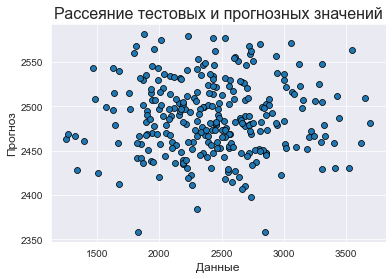

,Данные,Прогноз
0,2362.418794,2498.744546
1,2347.009635,2477.080739
2,2855.131016,2490.540667
3,2570.365126,2468.498043
4,2086.331974,2513.305952
...,...,...
276,1831.362292,2358.272330
277,3409.525741,2430.680631
278,2213.674603,2439.148877
279,2836.912038,2497.524131


In [38]:
#Спрогнозированные данные
predict11 = model_base11.predict(Xtest11)
predict11_values = np.ravel(predict11)
#Тестовые данные
tv11 = Ytest11.copy()
test11_values = np.ravel(tv11)
#Преобразуем нормализованные данные к исходным
col11 = ["Прочность при растяжении, МПа"]
#Определим параметры, которые использовались для нормализации
min_11 = np.min(df_all[col11])
max_11 = np.max(df_all[col11])
#Сделаем преобразование, обратное нормализации (для нормализации использовался MinMaxScaler от 0 до 1)
i = 0
while i < len(predict11_values):
    predict11_values[i] = predict11_values[i]*(max_11 - min_11) + min_11
    test11_values[i] = test11_values[i]*(max_11 - min_11) + min_11
    i += 1
#Создадим датасет с тестовыми данными и прогнозными значениями
feature_results = pd.DataFrame({'Данные': test11_values,'Прогноз': predict11_values})
#Выведем график рассеяния. В случае идеального прогноза график походил бы на прямую
sns.set_style('darkgrid')
plt.title('Рассеяние тестовых и прогнозных значений',size=16)
plt.xlabel('Данные',size=12)
plt.ylabel('Прогноз',size=12)
sns.scatterplot(x='Данные', y='Прогноз', data=feature_results, edgecolor='black', palette='cubehelix')
plt.show()
feature_results

In [39]:
#Зададим сетку параметров, по которым будем оптимизировать модель (вторая модель)
t_search12 = {'n_estimators': list(np.linspace(100, 500, 5, dtype = int)),
             'loss': ['ls', 'lad', 'huber'],
             'max_depth': [2, 3, 5, 10, 15]}
#В качестве второй модели будем использовать метод градиентного бустинга
clf12 = GradientBoostingRegressor()

In [40]:
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
#Количество блоков для перекрестной проверки cv = 10
model12 = GridSearchCV(estimator = clf12, scoring = 'r2', param_grid = t_search12, cv = 10, verbose= 1, n_jobs = -1)
model12.fit(Xtrn12,np.ravel(Ytrn12))
#Используем преобразование np.ravel() массива [[],[],...] к одномерному массиву [,,...]

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 31.1min finished


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'loss': ['ls', 'lad', 'huber'],
                         'max_depth': [2, 3, 5, 10, 15],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='r2', verbose=1)

In [41]:
best_estimator = model12.best_estimator_
#Выводим гиперпараметры для оптимальной модели
print(best_estimator)
#выводим точность оптимального трейнера
print(model12.best_score_)


GradientBoostingRegressor(loss='lad', max_depth=2)
-0.04728035162658113


In [42]:
#Определяем функцию для вычисления точности модели. На входе модель, а также входные параметры и целевая переменная
def evaluate_2(model, test_features, test_labels):
    #Делаем предсказание на основе входных параметров
    predictions = model.predict(test_features)
    #Преобразуем к виду [[],[],...] из одномерного массива
    predict = np.reshape(predictions,(predictions.size, 1))
    #Считаем абсолютные ошибки в предсказаниях (разность между предсказанным значением и целевым значением)
    errors = abs(predict - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    #Определяем точность модели
    accuracy = 100 - mape
    print('Средняя абсолютная ошибка: {:0.4f}'.format(np.mean(errors.values)))
    #print('Точность = {:0.2f}%.'.format(accuracy[0]))
    return accuracy

In [44]:
#Подставляем оптимальные гиперпараметры в модель
model_base12 = GradientBoostingRegressor(loss='lad', max_depth=2)
#Обучаем модель
model_base12.fit(Xtrn12,np.ravel(Ytrn12))

GradientBoostingRegressor(loss='lad', max_depth=2)

In [45]:
#Оцениваем точность на тренировочном наборе
base_accuracy = evaluate_2(model_base12, Xtrn12, Ytrn12)
#Оцениваем точность на тестовом наборе
base_accuracy = evaluate_2(model_base12, Xtest12, Ytest12)

Средняя абсолютная ошибка: 0.1342
Средняя абсолютная ошибка: 0.1511


In [46]:
#Важность папаметров в модели
importances = model_base12.feature_importances_
#получаем названия колонок параметров
feature_list = list(Xtrn12.columns)
#Формируем таблицу для представления
feature_results = pd.DataFrame({'Параметр': feature_list,'Важность параметра': importances})
#Сортируем по уменьшению важности
feature_results = feature_results.sort_values('Важность параметра',ascending = False).reset_index(drop=True)

In [47]:
feature_results

,Параметр,Важность параметра
0,"Содержание эпоксидных групп,%_2",0.210368
1,Шаг нашивки,0.160035
2,"Поверхностная плотность, г/м2",0.141404
3,"Температура вспышки, С_2",0.120233
4,"Потребление смолы, г/м2",0.115017
5,"Количество отвердителя, м.%",0.083611
6,"модуль упругости, ГПа",0.079971
7,"Плотность, кг/м3",0.052826
8,Плотность нашивки,0.029688
9,"Угол нашивки, град",0.006848


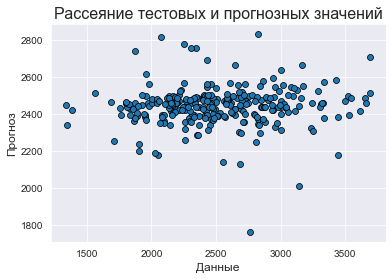

,Данные,Прогноз
0,3495.239969,2473.020209
1,2492.548071,2428.376451
2,2662.906040,2489.263354
3,2177.064956,2440.011871
4,3616.428136,2413.884904
...,...,...
276,2195.011890,2489.263354
277,2282.412785,2436.936132
278,2805.158519,2473.020209
279,2465.322110,2438.081164


In [49]:
#Спрогнозированные данные
predict12 = model_base12.predict(Xtest12)
predict12_values = np.ravel(predict12)
#Тестовые данные
tv12 = Ytest12.copy()
test12_values = np.ravel(tv12)
#Преобразуем нормализованные данные к исходным
col12 = ["Прочность при растяжении, МПа"]
#Определим параметры, которые использовались для нормализации
min_12 = np.min(df_all[col12])
max_12 = np.max(df_all[col12])
#Сделаем преобразование, обратное нормализации (для нормализации использовался MinMaxScaler от 0 до 1)
i = 0
while i < len(predict12_values):
    predict12_values[i] = predict12_values[i]*(max_12 - min_12) + min_12
    test12_values[i] = test12_values[i]*(max_12 - min_12) + min_12
    i += 1
#Создадим датасет с тестовыми данными и прогнозными значениями
feature_results = pd.DataFrame({'Данные': test12_values,'Прогноз': predict12_values})
#Выведем график рассеяния. В случае идеального прогноза график походил бы на прямую
sns.set_style('darkgrid')
plt.title('Рассеяние тестовых и прогнозных значений',size=16)
plt.xlabel('Данные',size=12)
plt.ylabel('Прогноз',size=12)
sns.scatterplot(x='Данные', y='Прогноз', data=feature_results, edgecolor='black', palette='cubehelix')
plt.show()
feature_results

In [50]:
#Отделяем выходные переменные и входные
#Теперь проверим модели для прогнозирования Модуль упругости при растяжении, ГПа
colnames_out_2 = ["Модуль упругости при растяжении, ГПа"]
colnames_in_2 = ["Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град","Шаг нашивки","Плотность нашивки"]
#Выходные
trg2 = df_all_normal[colnames_out_2]
#Входные
trn2 = df_all_normal[colnames_in_2]

In [51]:
#Подготовка обучающей и тестовой выборок (соотношение 70 на 30)
#Перекрестную проверку будем проводить на 70% данных 30% оставим на итоговое тестирование
Xtrn21, Xtest21, Ytrn21, Ytest21 = train_test_split(trn2, trg2, test_size=0.3)
Xtrn22, Xtest22, Ytrn22, Ytest22 = train_test_split(trn2, trg2, test_size=0.3)

In [62]:
#Зададим сетку параметров, по которым будем оптимизировать модель
#t_search21 = {'fit_intercept': [True, False],
#               'positive': [True, False]}
t_search21 = {'fit_intercept': [True, False]}
#               'positive': [True, False]}
#В качестве первой модели будем использовать линейную регрессию
clf21 = LinearRegression()
t_search21

{'fit_intercept': [True, False]}

In [63]:
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
#Количество блоков для перекрестной проверки cv = 10
model21 = GridSearchCV(estimator = clf21, scoring = 'r2', param_grid = t_search21, cv = 10, verbose= 1, n_jobs = -1)
model21.fit(Xtrn21,Ytrn21)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.2s finished


GridSearchCV(cv=10, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False]}, scoring='r2',
             verbose=1)

In [64]:
best_estimator = model21.best_estimator_
#Выводим гиперпараметры для оптимальной модели
print(best_estimator)
#выводим точность оптимального трейнера
print(model12.best_score_)

LinearRegression()
-0.04728035162658113


In [66]:
#Подставляем оптимальные гиперпараметры в модель
model_base21 = LinearRegression()
#Обучаем модель
model_base21.fit(Xtrn21,Ytrn21)

LinearRegression()

In [67]:
#Оцениваем точность на тренировочном наборе
base_accuracy = evaluate(model_base21, Xtrn21, Ytrn21)
#Оцениваем точность на тестовом наборе
base_accuracy = evaluate(model_base21, Xtest21, Ytest21)

Средняя абсолютная ошибка: 0.1549
Средняя абсолютная ошибка: 0.1520


In [69]:
#Важность папаметров в модели
importances = np.ravel(model_base21.coef_)
#получаем названия колонок параметров
feature_list = list(Xtrn21.columns)
#Формируем таблицу для представления
feature_results = pd.DataFrame({'Параметр': feature_list,'Важность параметра': importances})
#Сортируем по уменьшению важности
feature_results = feature_results.sort_values('Важность параметра',ascending = False).reset_index(drop=True)

In [70]:
feature_results

,Параметр,Важность параметра
0,"Содержание эпоксидных групп,%_2",0.064616
1,"Потребление смолы, г/м2",0.052380
2,"модуль упругости, ГПа",0.051579
3,"Поверхностная плотность, г/м2",0.051574
4,Плотность нашивки,0.036436
5,"Температура вспышки, С_2",0.009062
6,"Угол нашивки, град",0.008442
7,"Плотность, кг/м3",-0.014386
8,Шаг нашивки,-0.015037
9,"Количество отвердителя, м.%",-0.050114


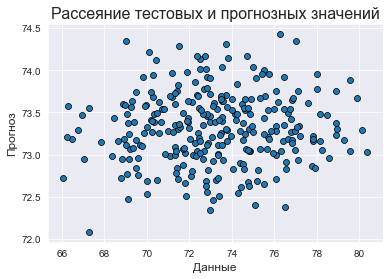

,Данные,Прогноз
0,73.495350,73.259040
1,71.450077,73.302752
2,74.220351,73.414750
3,69.954877,73.582253
4,73.528438,73.396948
...,...,...
276,69.560636,72.961737
277,72.950379,73.904544
278,68.830496,72.951803
279,74.943218,73.344088


In [71]:
#Спрогнозированные данные
predict21 = model_base21.predict(Xtest21)
predict21_values = np.ravel(predict21)
#Тестовые данные
tv21 = Ytest21.copy()
test21_values = np.ravel(tv21)
#Преобразуем нормализованные данные к исходным
col21 = ["Модуль упругости при растяжении, ГПа"]
#Определим параметры, которые использовались для нормализации
min_21 = np.min(df_all[col21])
max_21 = np.max(df_all[col21])
#Сделаем преобразование, обратное нормализации (для нормализации использовался MinMaxScaler от 0 до 1)
i = 0
while i < len(predict21_values):
    predict21_values[i] = predict21_values[i]*(max_21 - min_21) + min_21
    test21_values[i] = test21_values[i]*(max_21 - min_21) + min_21
    i += 1
#Создадим датасет с тестовыми данными и прогнозными значениями
feature_results = pd.DataFrame({'Данные': test21_values,'Прогноз': predict21_values})
#Выведем график рассеяния. В случае идеального прогноза график походил бы на прямую
sns.set_style('darkgrid')
plt.title('Рассеяние тестовых и прогнозных значений',size=16)
plt.xlabel('Данные',size=12)
plt.ylabel('Прогноз',size=12)
sns.scatterplot(x='Данные', y='Прогноз', data=feature_results, edgecolor='black', palette='cubehelix')
plt.show()
feature_results

In [73]:
#Зададим сетку параметров, по которым будем оптимизировать модель
t_search22 = {'kernel': ['linear', 'poly', 'rbf'],
               'degree': list(np.linspace(3, 5, 3, dtype = int))}
#В качестве второй модели будем использовать метод опорных векторов
clf22 = SVR()

In [74]:
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
#Количество блоков для перекрестной проверки cv = 10
model22 = GridSearchCV(estimator = clf22, scoring = 'r2', param_grid = t_search22, cv = 10, verbose= 1, n_jobs = -1)
model22.fit(Xtrn22,np.ravel(Ytrn22))
#Используем преобразование np.ravel() массива [[],[],...] к одномерному массиву [,,...]

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.0min finished


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='r2', verbose=1)

In [75]:
best_estimator = model22.best_estimator_
#Выводим гиперпараметры для оптимальной модели
print(best_estimator)
#выводим точность оптимального трейнера
print(model22.best_score_)

SVR(kernel='linear')
-0.017358640515810608


In [76]:
#Подставляем оптимальные гиперпараметры в модель
model_base22 = SVR(kernel='linear')
#Обучаем модель
model_base22.fit(Xtrn22,np.ravel(Ytrn22))

SVR(kernel='linear')

In [77]:
#Оцениваем точность на тренировочном наборе
base_accuracy = evaluate_2(model_base22, Xtrn22, Ytrn22)
#Оцениваем точность на тестовом наборе
base_accuracy = evaluate_2(model_base22, Xtest22, Ytest22)

Средняя абсолютная ошибка: 0.1513
Средняя абсолютная ошибка: 0.1598


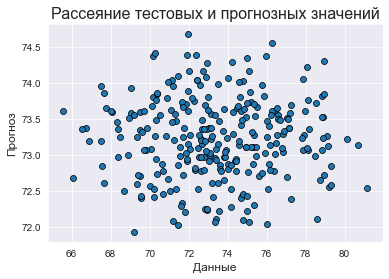

,Данные,Прогноз
0,74.018536,74.074032
1,71.110425,73.627558
2,71.714274,73.700859
3,76.439841,73.604874
4,73.833984,72.644920
...,...,...
276,72.622376,72.975359
277,68.005772,73.612882
278,75.756603,72.751212
279,74.728272,73.482657


In [78]:
#Спрогнозированные данные
predict22 = model_base22.predict(Xtest22)
predict22_values = np.ravel(predict22)
#Тестовые данные
tv22 = Ytest22.copy()
test22_values = np.ravel(tv22)
#Преобразуем нормализованные данные к исходным
col22 = ["Модуль упругости при растяжении, ГПа"]
#Определим параметры, которые использовались для нормализации
min_22 = np.min(df_all[col22])
max_22 = np.max(df_all[col22])
#Сделаем преобразование, обратное нормализации (для нормализации использовался MinMaxScaler от 0 до 1)
i = 0
while i < len(predict22_values):
    predict22_values[i] = predict22_values[i]*(max_22 - min_22) + min_22
    test22_values[i] = test22_values[i]*(max_22 - min_22) + min_22
    i += 1
#Создадим датасет с тестовыми данными и прогнозными значениями
feature_results = pd.DataFrame({'Данные': test22_values,'Прогноз': predict22_values})
#Выведем график рассеяния. В случае идеального прогноза график походил бы на прямую
sns.set_style('darkgrid')
plt.title('Рассеяние тестовых и прогнозных значений',size=16)
plt.xlabel('Данные',size=12)
plt.ylabel('Прогноз',size=12)
sns.scatterplot(x='Данные', y='Прогноз', data=feature_results, edgecolor='black', palette='cubehelix')
plt.show()
feature_results

In [79]:
###########----------------сеть